# Explore here

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, r2_score


In [10]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv"
pd.read_csv(url).to_csv('../data/medical_insurance_cost.csv', index=False)

In [11]:
df = pd.read_csv("../data/medical_insurance_cost.csv")

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
#Eliminar duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Duplicados del data frame {num_duplicados}")

df = df.drop_duplicates()
print(df.duplicated().sum())

Duplicados del data frame 1
0


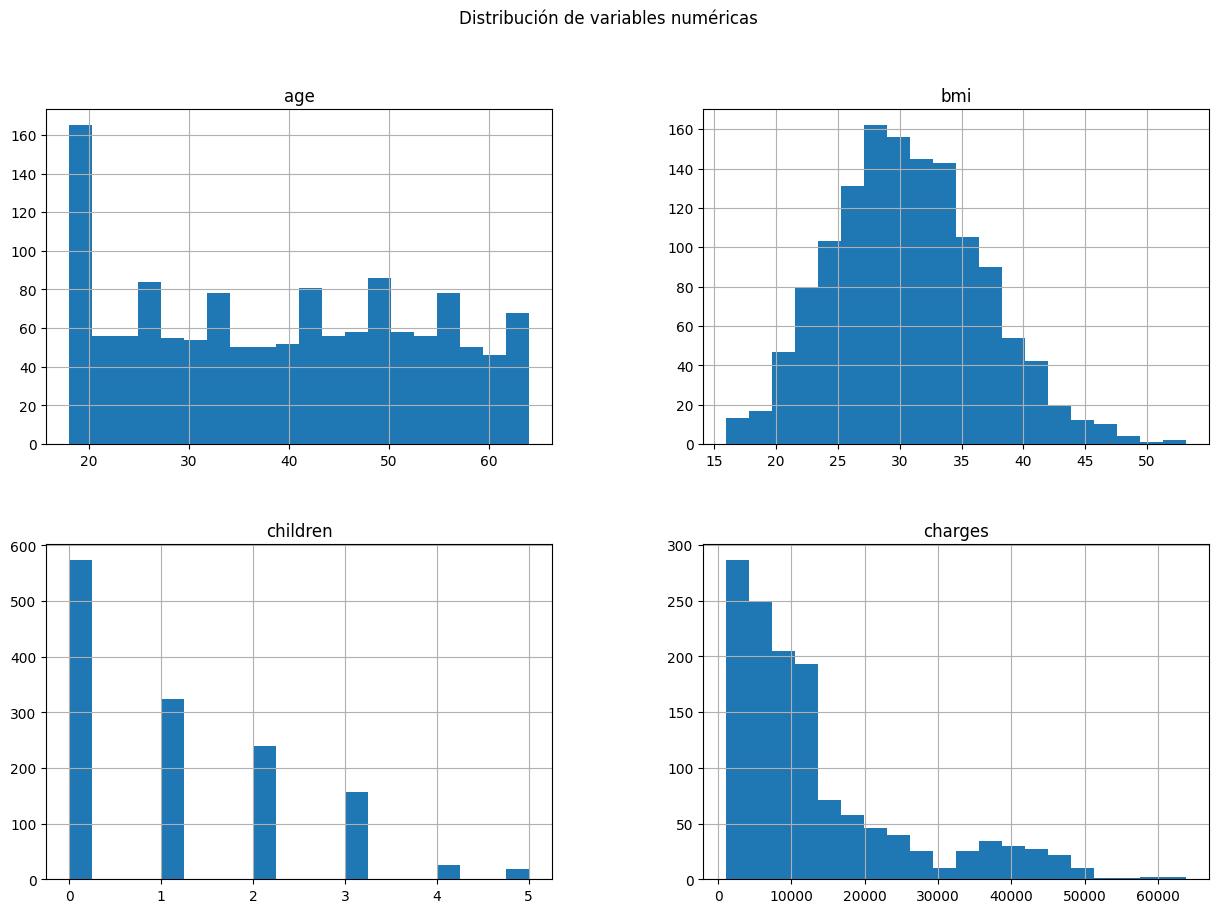

In [15]:
# Aislar variantes numericas y ver distribucion
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.show()

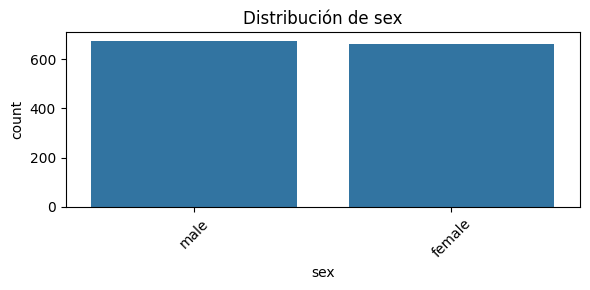

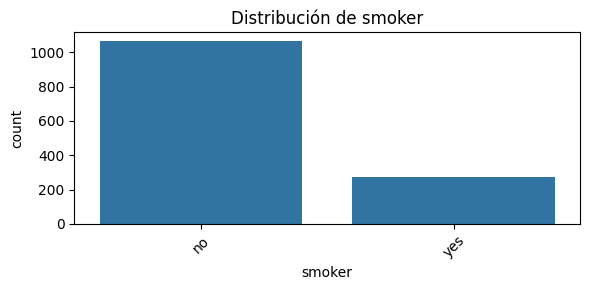

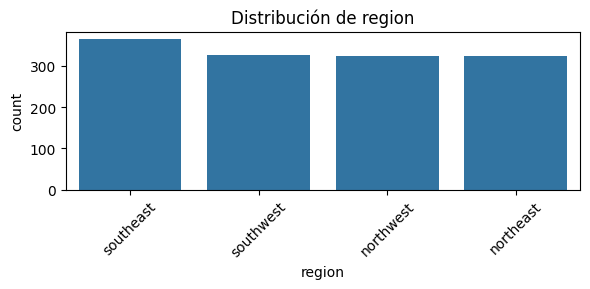

In [16]:
#Aislar variantes categoricas y ver distribucion
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

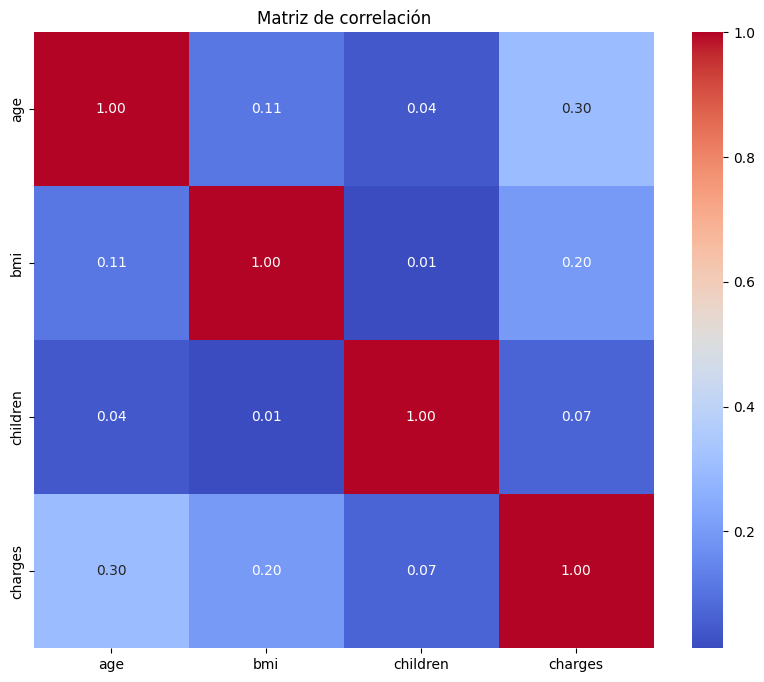

In [17]:
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

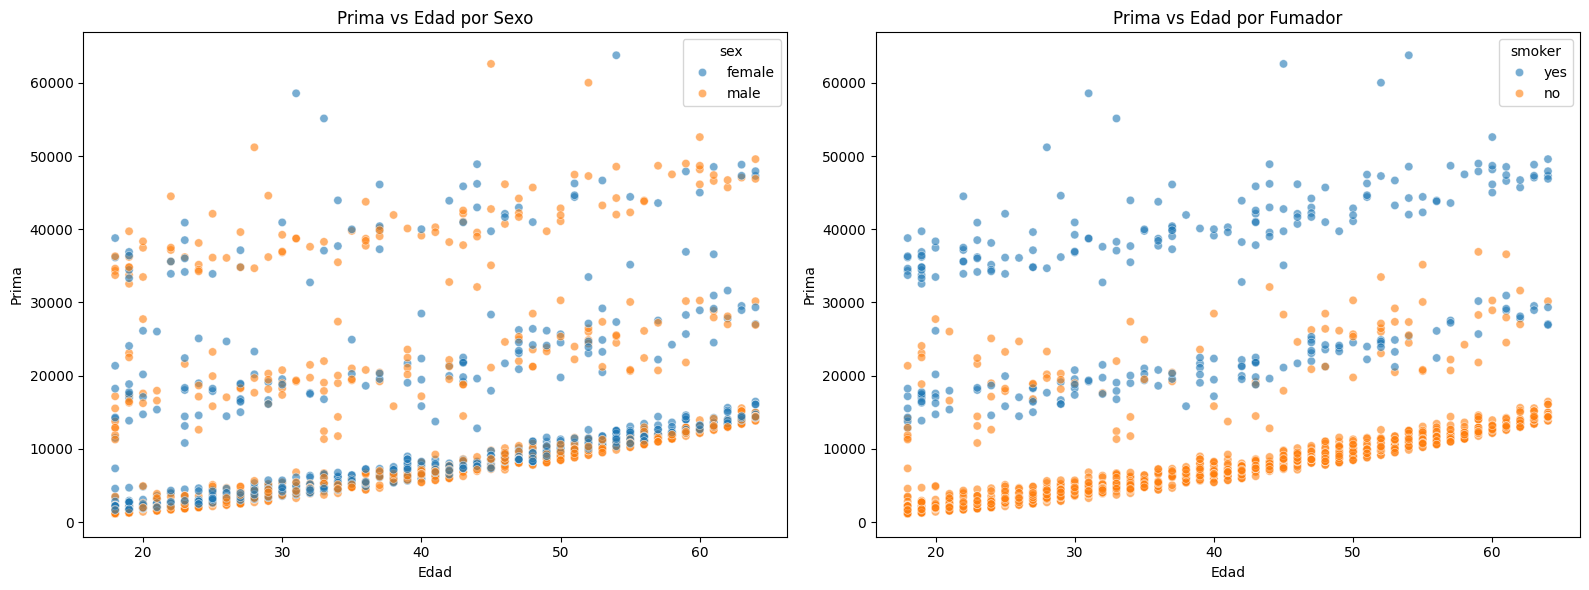

In [18]:
#Comparar Primas vs edad por sexo y por smoker
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.scatterplot(data=df, x='age', y='charges', hue='sex', alpha=0.6, ax=axes[0])
axes[0].set_title('Prima vs Edad por Sexo')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Prima')


sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.6, ax=axes[1])
axes[1].set_title('Prima vs Edad por Fumador')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Prima')


plt.tight_layout()
plt.show()

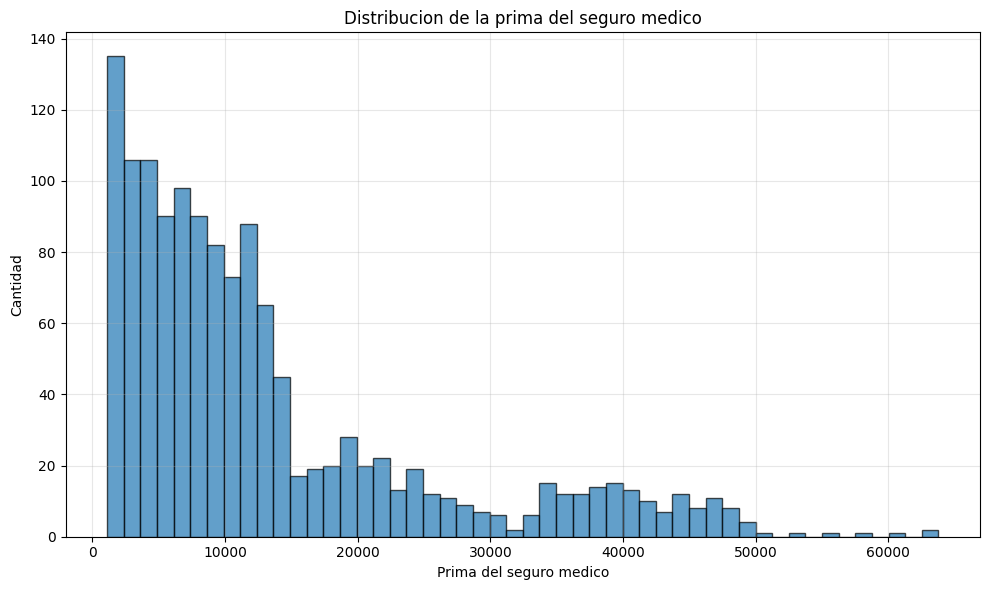

In [19]:
# HISTOGRAMA DE PRECIOS
plt.figure(figsize=(10,6))
plt.hist(df['charges'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribucion de la prima del seguro medico')
plt.xlabel('Prima del seguro medico')
plt.ylabel('Cantidad')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
#Codificar df
df_encoded = pd.get_dummies(df[cat_cols])
df_corr = pd.concat([df_encoded, df['charges']], axis=1)
corr = df_corr.corr()

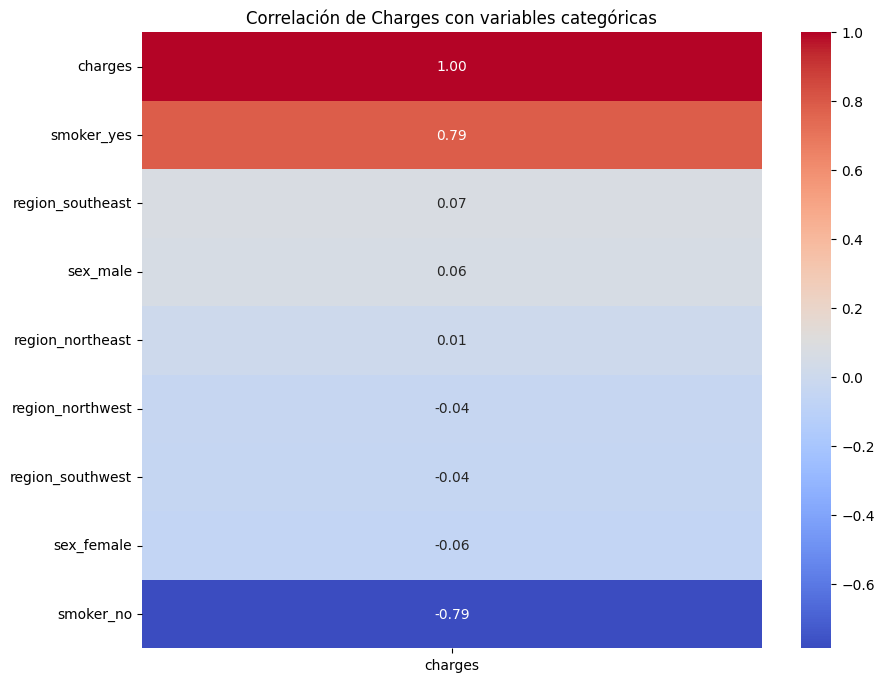

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Charges con variables categóricas')
plt.show()

In [22]:
df_encoded.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False


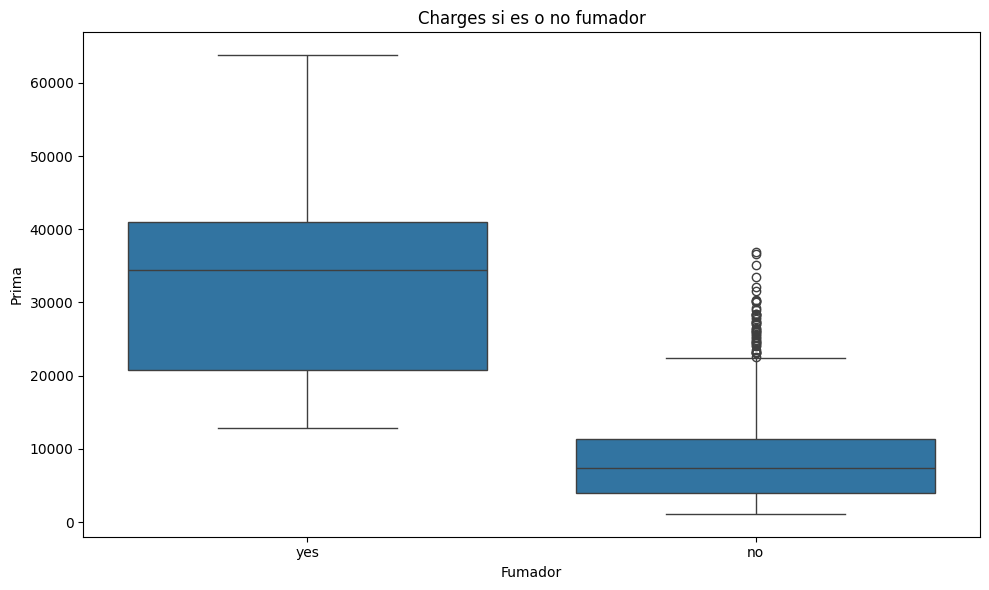

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges si es o no fumador')
plt.xlabel("Fumador")
plt.ylabel("Prima")
plt.tight_layout()
plt.show()

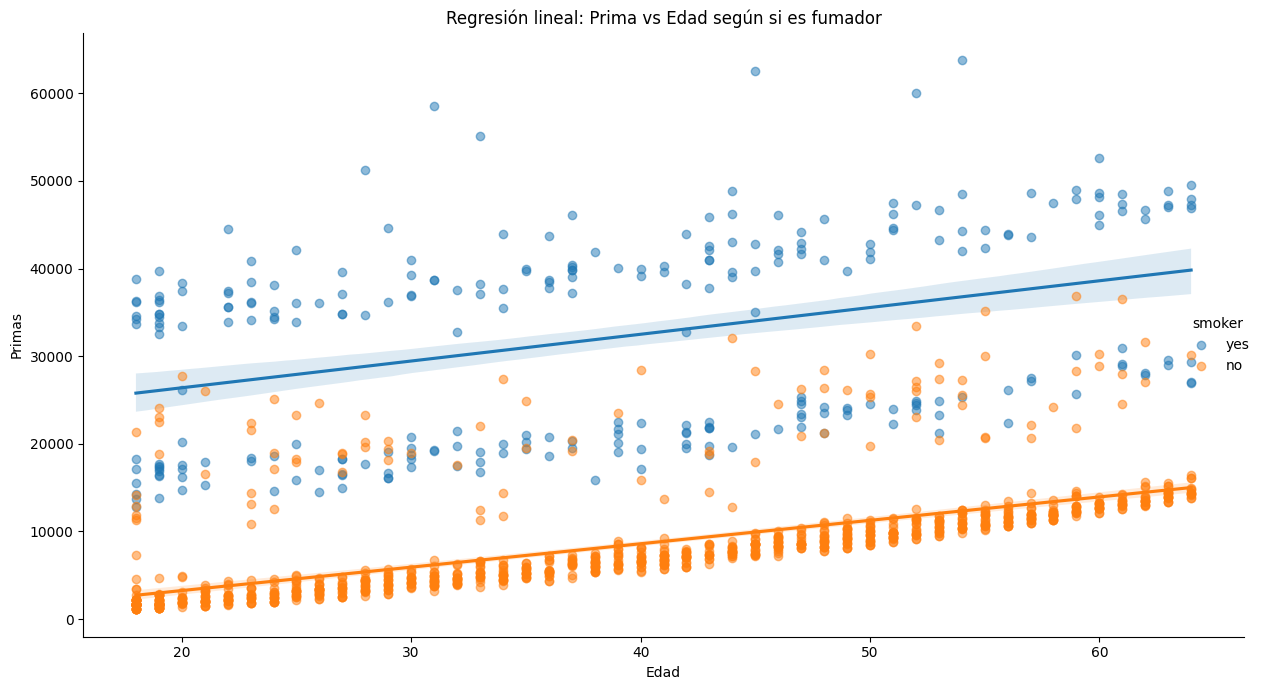

In [24]:
# Gráfico de regresión con hue por fumador
sns.lmplot(data=df, x='age', y='charges', hue='smoker', aspect=1.7, height=7, scatter_kws={'alpha':0.5})

plt.title('Regresión lineal: Prima vs Edad según si es fumador')
plt.xlabel('Edad')
plt.ylabel('Primas')
plt.tight_layout()
plt.show()

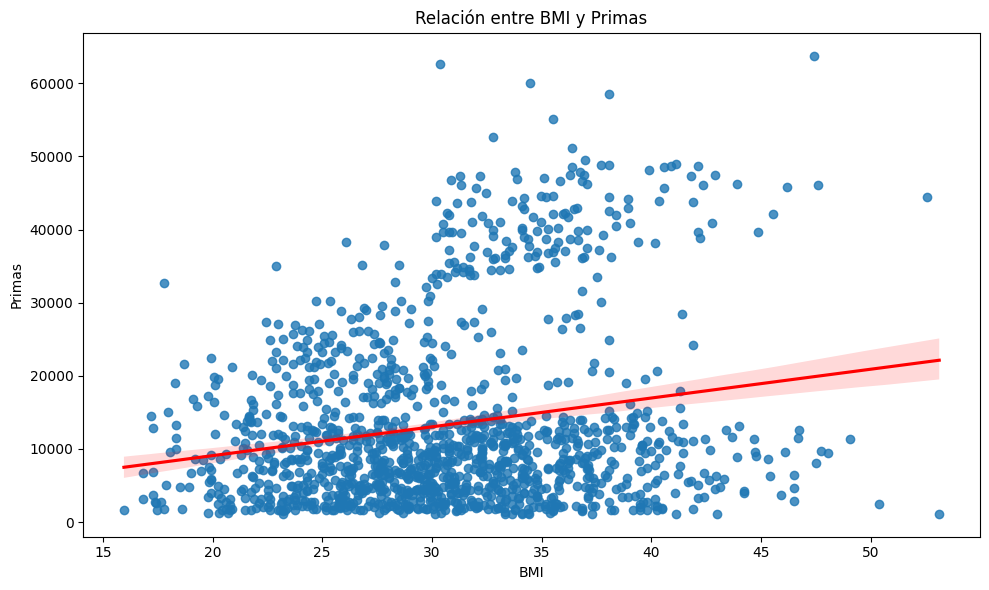

In [25]:

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='bmi', y='charges', scatter_kws={'alpha':0.8}, line_kws={'color':'red'})
plt.title('Relación entre BMI y Primas')
plt.xlabel('BMI')
plt.ylabel('Primas')
plt.tight_layout()
plt.show()


In [26]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

In [27]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [28]:
X_train = df_encoded.drop(["charges"], axis = 1)
y_train = df_encoded["charges"]

X_test = df_encoded.drop(["charges"], axis = 1)
y_test = df_encoded["charges"]

In [29]:
model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1): {model.coef_}")

Intercepto (b0): -11936.55750720664
Coeficientes (b1): [  256.76461078   339.2503637    474.8204855   -129.48147837
 23847.32884379  -349.22653156 -1035.26560176  -960.08138547]


In [31]:
y_pred = model.predict(X_test)
y_pred

array([25294.30270323,  3451.76367443,  6707.82797318, ...,
        4151.3157875 ,  1248.07731722, 37086.19413545], shape=(1337,))

In [32]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 36528121.63726907
RMSE: 6043.849901947357
Coeficiente de determinación: 0.7507482551410236
